In [1]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
%matplotlib inline
print("Using PyTorch Version %s" %torch.__version__)

Using PyTorch Version 1.7.0+cpu


## Pytorch Basics 

### Matrices


In pytorch, matrix(array) is called tensors.
<br>Lets look at array example with numpy that we already know.
<br>We create numpy array with np.numpy() method
<br>Type(): type of the array. In this example it is numpy
<br>np.shape(): shape of the array. Row x Column

In [2]:

import numpy as np

# numpy array
array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2x3 array
print("Array Type: {}".format(type(first_array))) # type
print("Array Shape: {}".format(np.shape(first_array))) # shape
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


Now examine how we implement tensor(pytorch array)
<br>import pytorch library with import torch
<br>We create tensor with torch.Tensor() method
<br>type: type of the array. In this example it is tensor
<br>shape: shape of the array. Row x Column

In [3]:
# import pytorch library
import torch

# pytorch array
tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type)) # type
print("Array Shape: {}".format(tensor.shape)) # shape
print(tensor)

Array Type: <built-in method type of Tensor object at 0x0000025BE800FFC0>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


Allocation is one of the most used technique in coding. Therefore lets learn how to make it with pytorch.
<br>In order to learn, compare numpy and tensor
<br>np.ones() = torch.ones()
<br>np.random.rand() = torch.rand()

In [4]:
# numpy ones
print("Numpy {}\n".format(np.ones((2,3))))

# pytorch ones
print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [5]:
# numpy random
print("Numpy {}\n".format(np.random.rand(2,3)))

# pytorch random
print(torch.rand(2,3))

Numpy [[0.50652026 0.02751454 0.05503772]
 [0.64553102 0.3499809  0.46632997]]

tensor([[0.1259, 0.3684, 0.2791],
        [0.9492, 0.8609, 0.4123]])


Lets look at conversion between tensor and numpy arrays.
<br>torch.from_numpy(): from numpy to tensor
<br>numpy(): from tensor to numpy

In [6]:
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.44995228 0.61279002]
 [0.70561575 0.02751359]]

tensor([[0.4500, 0.6128],
        [0.7056, 0.0275]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.44995228 0.61279002]
 [0.70561575 0.02751359]]



### Basic Math with Pytorch


Resize: view()
<br>a and b are tensor.
<br>Addition: torch.add(a,b) = a + b
<br>Subtraction: a.sub(b) = a - b
<br>Element wise multiplication: torch.mul(a,b) = a * b
<br>Element wise division: torch.div(a,b) = a / b
<br>Mean: a.mean()
<br>Standart Deviation (std): a.std()

In [7]:
# create tensor 
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


### Variables


<br>It accumulates gradients.
<br>Difference between variables and tensor is variable accumulates gradients.
<br>We can make math operations with variables, too.
<br>In order to make backward propagation we need variables

In [8]:
# import variable from pytorch library
from torch.autograd import Variable

# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [9]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


## ANN 

Let’s first generate our data. 


In [10]:
np.random.seed(0)
torch.manual_seed(0)
X, Y = make_moons(500, noise=0.2)


Split into test and training data


In [11]:

# Split into test and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=0.25, random_state=73)

This is a pretty straightforward data set that has two crescent moon-shaped groups that we try to classify. It’s good for a problem like this because in this 2D space, the classification boundary is non-linear meaning that linear discriminators can’t classify this properly. However, neural networks are non-linear function approximators so they in fact can deal with this, as we’ll soon see. 


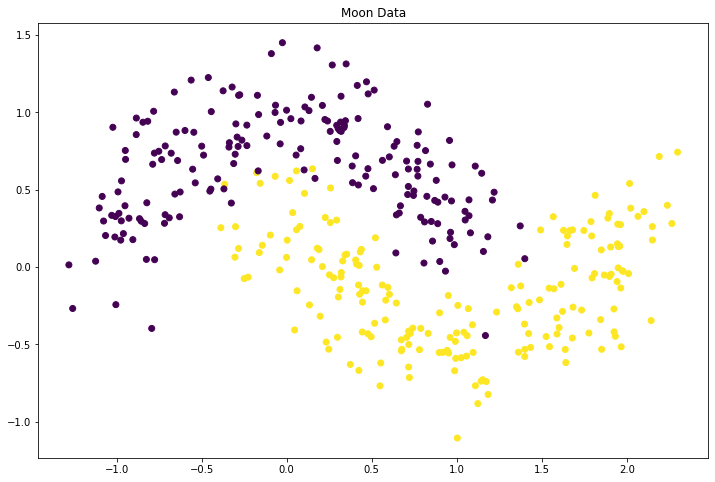

In [12]:
#plot the data
plt.figure(figsize=(12,8))
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train)
plt.title('Moon Data')
plt.show()

# Build our Neural Network


PyTorch networks are really quick and easy to build, just set up the inputs and outputs as needed, then stack your linear layers together with a non-linear activation function in between. At the end of it, you’ll be able to simply print your network for visual inspection.
We don’t need a very large network for this classification task, so we’ll keep it small and clean.

In [18]:
# Define network dimensions
n_input_dim = X_train.shape[1]
# Layer size
n_hidden = 4 # Number of hidden nodes
n_output = 1 # Number of output nodes = for binary classifier

# Build your network
net = nn.Sequential(
    nn.Linear(n_input_dim, n_hidden),
    nn.ELU(),
    nn.Linear(n_hidden, n_output),
    nn.Sigmoid())
    
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ELU(alpha=1.0)
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)


There we have it! Just a few lines of code and we have a neural network for binary classification. We still have a few steps to set up before we get around to training it, but I want to point out that the network itself takes inputs to produce a given output, there are no special methods that need to be called or any other steps in order to complete a forward pass. For example: 

In [19]:
x = torch.FloatTensor([1, 1])
net(x)

tensor([0.4413], grad_fn=<SigmoidBackward>)

Here, we just define a FloatTensor in PyTorch, and pass the values to get a prediction

Now let’s go back to getting our network ready to train by defining the loss function and optimizer. 


In [20]:
loss_func = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

For this, all that is needed is the binary cross entropy loss (BCELoss) function, and to set our optimizer and its learning rate. Thanks to the wonders of auto differentiation, we can let PyTorch handle all of the derivatives and messy details of backpropagation making our training seamless and straightforward. 

# Training a PyTorch Classifier


To train our network, we just need to loop over our data set a few hundred times until we reach convergence. Typically, you’d break training up into mini-batches, but this data set is small enough that we can simply pass the whole thing through, make our predictions, calculate the loss, and update the network all in one pass.
As shown above, PyTorch doesn’t take Numpy arrays directly, so we’ll need to pass those values through the torch.FloatTensor function first to convert it to the proper format, which I’ve denoted with an underscore t (_t) for clarity. 

Once we’ve made our predictions and calculated our loss, we need to call the .backward() method on the loss tensor itself. This tells PyTorch to calculate all of the gradients for our network. After that, we tell the optimizer to .step() forward, which applies those gradients to all of the weights and biases in the network, causing it to learn the data better. After that, we can zero out all of the gradients, essentially throwing them away so that we can apply the new gradients after the next iteration.

To log our data, you’ll notice we call the .detach() method on our predictions, y_hat. We do this to tell PyTorch to remove the graph structure from this value meaning that we no longer want to calculate derivatives with these values. It’s very important to keep track of what are variables with gradients and which ones aren’t, particularly if you have multiple networks working together. Here, we also convert the tensor to a NumPy array for additional flexibility. For this problem, this last step isn’t strictly necessary, but I included it for illustration

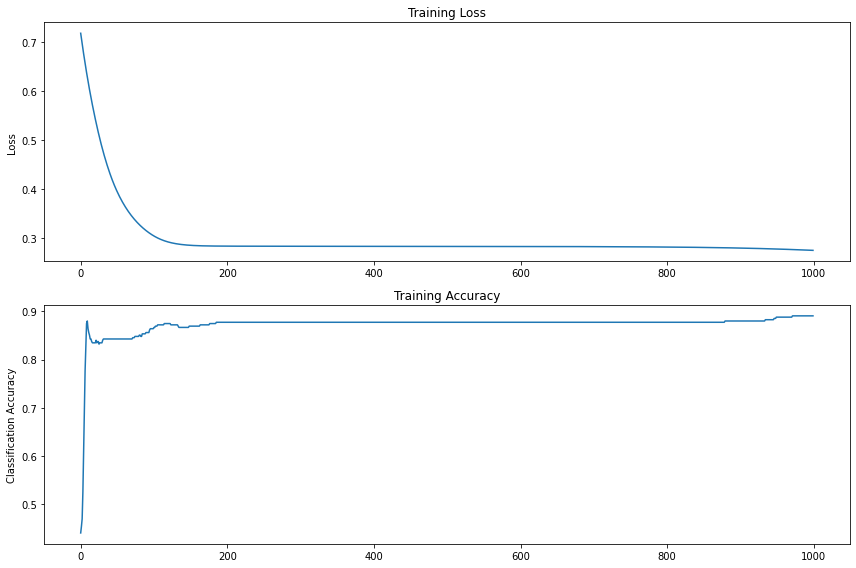

In [21]:
train_loss = []
train_accuracy = []
iters = 1000
Y_train_t = torch.FloatTensor(Y_train).reshape(-1, 1)
for i in range(iters):
    X_train_t = torch.FloatTensor(X_train)
    y_hat = net(X_train_t)
    loss = loss_func(y_hat, Y_train_t)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    y_hat_class = np.where(y_hat.detach().numpy()<0.5, 0, 1)
    accuracy = np.sum(Y_train.reshape(-1,1)==y_hat_class) / len(Y_train)
    train_accuracy.append(accuracy)
    train_loss.append(loss.item())
    
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(train_loss)
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')

ax[1].plot(train_accuracy)
ax[1].set_ylabel('Classification Accuracy')
ax[1].set_title('Training Accuracy')

plt.tight_layout()
plt.show()

It worked! Our network trained over the 1,000 iterations and pushed its classification accuracy towards 90%. Let’s go ahead and visualize this to see how well it fares on our test set. 

In [ ]:
# Pass test data
X_test_t = torch.FloatTensor(X_test)
y_hat_test = net(X_test_t)
y_hat_test_class = np.where(y_hat_test.detach().numpy()<0.5, 0, 1)
test_accuracy = np.sum(Y_test.reshape(-1,1)==y_hat_test_class) / len(Y_test)
print("Test Accuracy {:.2f}".format(test_accuracy))

# Plot the decision boundary
# Determine grid range in x and y directions
x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

# Set grid spacing parameter
spacing = min(x_max - x_min, y_max - y_min) / 100

# Create grid
XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
               np.arange(y_min, y_max, spacing))

# Concatenate data to match input
data = np.hstack((XX.ravel().reshape(-1,1), 
                  YY.ravel().reshape(-1,1)))

# Pass data to predict method
data_t = torch.FloatTensor(data)
db_prob = net(data_t)

clf = np.where(db_prob<0.5,0,1)

Z = clf.reshape(XX.shape)

plt.figure(figsize=(12,8))
plt.contourf(XX, YY, Z, cmap=plt.cm.Accent, alpha=0.5)
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, 
            cmap=plt.cm.Accent)
plt.show()

87% accuracy isn’t too shabby for such a small network, but we can do better by tuning the hyperparameters a bit. In this case, we’ll tweak the number of hidden nodes to see if we get better results. 

# Improving our Accuracy


Let’s run this in a loop and see how adjusting the hidden nodes changes our results. 

We’ll implement an object oriented approach to building and training these networks which will make it much, much easier for us to adjust when we need to. 

In [ ]:
class network():
    
    def __init__(self, X, Y, n_hidden=4, learning_rate=1e-2):
        #global variables
        self.X = X
        self.Y = Y.reshape(-1,1)
        self.Y_t = torch.FloatTensor(self.Y)
        self.n_input_dim = X.shape[1]
        self.n_output = 1
        self.learning_rate = learning_rate
        self.n_hidden = n_hidden
        
        # Build network
        self.net = nn.Sequential(
            nn.Linear(self.n_input_dim, self.n_hidden), 
            nn.ELU(),
            nn.Linear(self.n_hidden, self.n_output),
            nn.Sigmoid())       
        self.loss_func = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.net.parameters(), 
                                          lr=self.learning_rate)
        
    def predict(self, X):
        # Function to generate predictions based on data
        X_t = torch.FloatTensor(X)
        return self.net(X_t)
    
    def calculate_loss(self, y_hat):
        #Function to calculate loss
        return self.loss_func(y_hat, self.Y_t)
    
    def update_network(self, y_hat):
        #Function to update the network
        self.optimizer.zero_grad()
        loss = self.calculate_loss(y_hat)
        loss.backward()
        self.optimizer.step()
        self.training_loss.append(loss.item())
        
    def calculate_accuracy(self, y_hat_class, Y):
        #Function to calculate the accuracy
        return np.sum(Y.reshape(-1,1)==y_hat_class) / len(Y)
        
    def train(self, n_iters=1000):
        #Function to train the network
        self.training_loss = []
        self.training_accuracy = []
        
        for i in range(n_iters):
            y_hat = self.predict(X)
            self.update_network(y_hat)
            y_hat_class = np.where(y_hat<0.5, 0, 1)
            accuracy = self.calculate_accuracy(y_hat_class, self.Y)
            self.training_accuracy.append(accuracy)
        
    def plot_testing_results(self, X_test, Y_test):
        # Pass test data
        y_hat_test = self.predict(X_test)
        y_hat_test_class = np.where(y_hat_test<0.5, 0, 1)
        print("Test Accuracy {:.2f}%".format(
            self.calculate_accuracy(y_hat_test_class, Y_test) * 100))
        # Plot the decision boundary
        # Determine grid range in x and y directions
        x_min, x_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
        y_min, y_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1

        # Set grid spacing parameter
        spacing = min(x_max - x_min, y_max - y_min) / 100

        # Create grid
        XX, YY = np.meshgrid(np.arange(x_min, x_max, spacing),
                       np.arange(y_min, y_max, spacing))

        # Concatenate data to match input
        data = np.hstack((XX.ravel().reshape(-1,1), 
                          YY.ravel().reshape(-1,1)))

        # Pass data to predict method
        db_prob = self.predict(data)

        clf = np.where(db_prob<0.5,0,1)

        Z = clf.reshape(XX.shape)

        plt.figure(figsize=(12,8))
        plt.contourf(XX, YY, Z, cmap=plt.cm.Accent, alpha=0.5)
        plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, 
                    cmap=plt.cm.Accent)
        plt.show()

In [ ]:
n_hidden_nodes = [1, 5, 10, 25, 50]

for n in n_hidden_nodes:
    print("Number of hidden nodes: {:d}".format(n))
    net = network(X, Y, n_hidden=n)
    net.train()
    net.plot_testing_results(X_test, Y_test)

The network shows that it is able to learn a reasonable decision boundary between the data sets. We get better and better results as we increase the number of hidden nodes in our network, although we do run the risk of over fitting. It would be instructive to see how the depth of the network can change the results we see here for the better and also to try to apply these same techniques to some more interesting classification problems. There are a wealth of interesting problems that can be attacked with these machine learning techniques and I encourage you to grab some data and see what you can come up with!
